# Трасформация изображений

В этом уроке мы рассмотрим основные операции преобразования изображений в OpenCV.

## 1. Scaling

Original shape: (432, 650, 3)


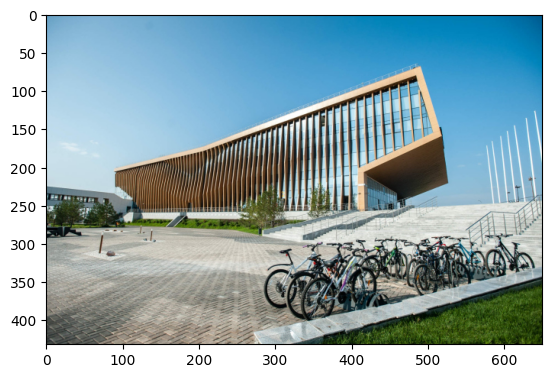

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('IU.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(f"Original shape: {img.shape}")
plt.imshow(img)

Resized shape: (864, 1300, 3)


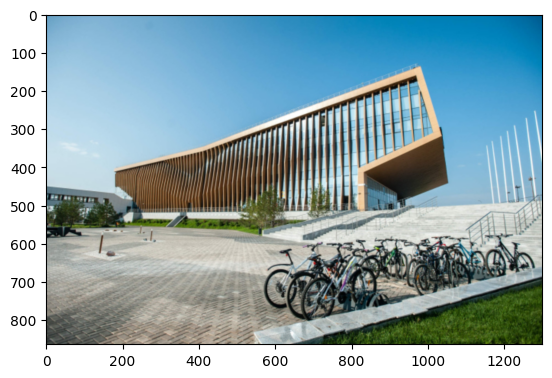

In [ ]:
import numpy as np

res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
# OR
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_LINEAR)
print(f"Resized shape: {res.shape}")
plt.imshow(res)

Resized shape: (130, 195, 3)


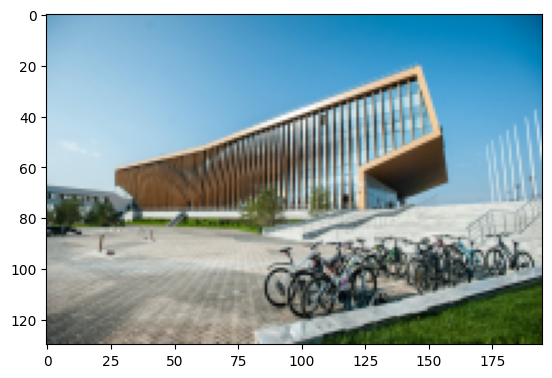

In [ ]:
res_down = cv.resize(img,None,fx=0.3, fy=0.3, interpolation = cv.INTER_AREA)
print(f"Resized shape: {res_down.shape}")
plt.imshow(res_down)

Сравним с кубическим методом интерполяции:

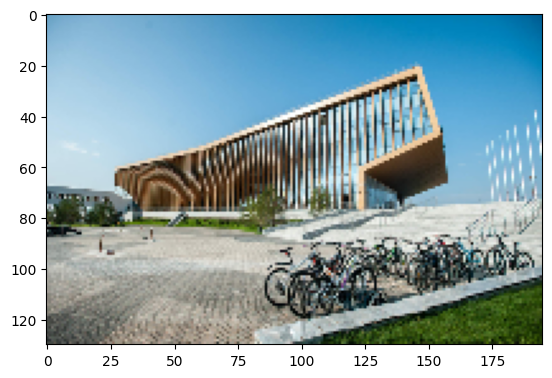

In [ ]:
res_down = cv.resize(img,None,fx=0.3, fy=0.3, interpolation = cv.INTER_CUBIC)
plt.imshow(res_down)

Предпочтительной интерполяцией для сжатия является INTER_AREA, для расширения - INTER_LINEAR или INTER_CUBIC


**INTER_AREA**: INTER_AREA uses pixel area relation for resampling. This is best suited for reducing the size of an image (shrinking). When used for zooming into the image, it uses the INTER_NEAREST method.

**INTER_CUBIC**: This uses bicubic interpolation for resizing the image. While resizing and interpolating new pixels, this method acts on the 4×4 neighboring pixels of the image. It then takes the weights average of the 16 pixels to create the new interpolated pixel.

**INTER_LINEAR**: This method is somewhat similar to the INTER_CUBIC interpolation. But unlike INTER_CUBIC, this uses 2×2 neighboring pixels to get the weighted average for the interpolated pixel.

**INTER_NEAREST**: The INTER_NEAREST method uses the nearest neighbor concept for interpolation. This is one of the simplest methods, using only one neighboring pixel from the image for interpolation.

## 2. Translation

Мы говорили о том, что через аффинное преобразование можно выразить scaling, translation, rotation, и их комбинации. В OpenCV это реализуется через функцию `warpAffine`, которая принимает входное изображение (можно цветное), матрицу трансформации и выходной размер картинки

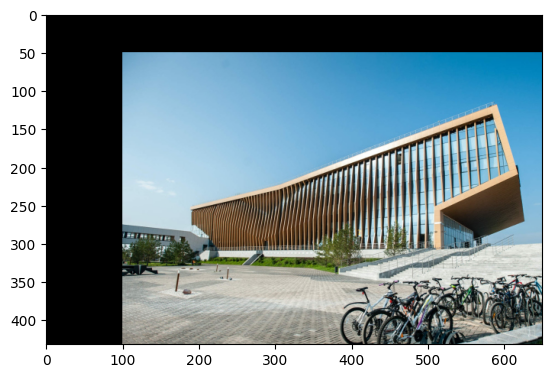

In [ ]:
rows, cols, _ = img.shape

# Создаем матрицу переноса
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst)

## 3. Rotation

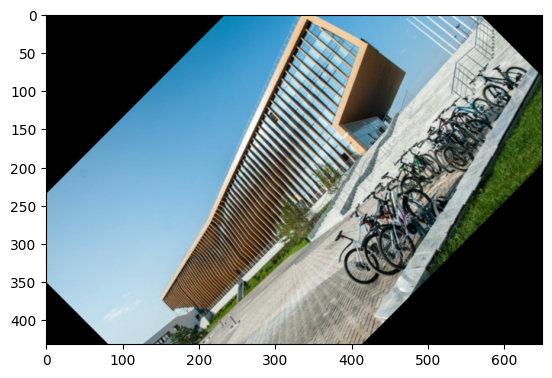

In [ ]:
rows,cols, _ = img.shape

# Поворот вокруг центра изображения
alpha = 45
scale = 1
center = ((cols-1)/2.0,(rows-1)/2.0)
M = cv.getRotationMatrix2D(center,alpha,scale)
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

## 4. Affine transformation

Аффинное преобразование в общем случае ожидает 3 координаты на входном и выходном изображениях. По пропорциям между ними будет преобразованно все изображение

<ipython-input-14-e18ec22ed587>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "og" (-> color='g'). The keyword argument will take precedence.
  plt.plot(455, 180, "og", markersize=5, color="red")
<ipython-input-14-e18ec22ed587>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "og" (-> color='g'). The keyword argument will take precedence.
  plt.plot(450, 100, "og", markersize=5, color="red")
<ipython-input-14-e18ec22ed587>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "og" (-> color='g'). The keyword argument will take precedence.
  plt.plot(230, 180, "og", markersize=5, color="red")


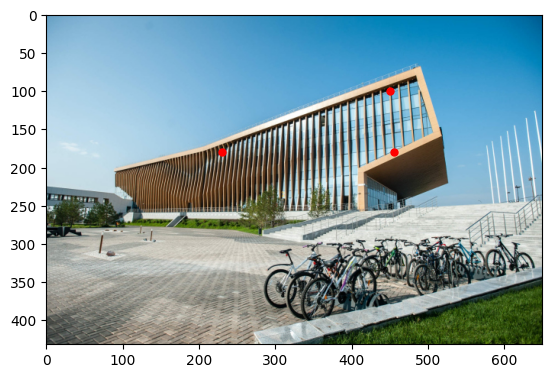

In [ ]:
pts1 = np.float32([[455,180],[450,100],[230,180]])
pts2 = np.float32([[500,100],[400,50],[100,300]])
plt.imshow(img)
plt.plot(455, 180, "og", markersize=5, color="red")
plt.plot(450, 100, "og", markersize=5, color="red")
plt.plot(230, 180, "og", markersize=5, color="red")
plt.show()

[[   1.77777778    1.13888889 -513.88888889]
 [  -0.88888889    0.68055556  381.94444444]]
[455. 180.]
[[500. 100.]]


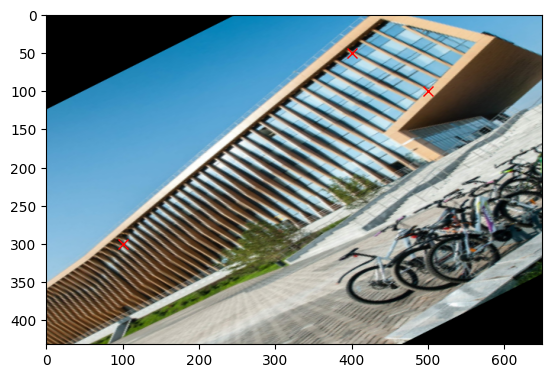

In [ ]:
M = cv.getAffineTransform(pts1,pts2)
# Убедимся, что M перемещает pts1[0] в pts2[0]
print(np.array(M))
print(np.array(pts1[0]).T)
print(np.array(M).dot(np.array([[*pts1[0], 1]]).T).T)
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

plt.plot(500, 100, "x", markersize=7, color="red")
plt.plot(400, 50, "x", markersize=7, color="red")
plt.plot(100, 300, "x", markersize=7, color="red")
plt.show()

Scaling через affine transformation:

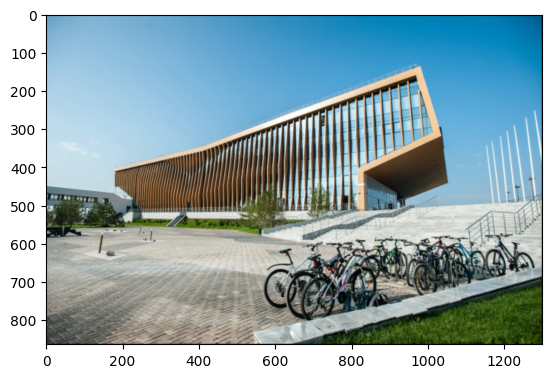

In [ ]:
alpha = 2
beta = 2
pts1 = np.float32([[455,180],[450,100],[230,180]])
pts2 = np.float32([[455*alpha,180*beta],[450*alpha,100*beta],[230*alpha,180*beta]])
M = cv.getAffineTransform(pts1,pts2)
rows, cols, _ = img.shape
dst = cv.warpAffine(img,M,(cols*alpha,rows*beta), cv.INTER_LINEAR)
plt.imshow(dst)

## 5. Perspective transformation

getPerspectiveTransform ожидает 4 точки из изображений

[[-9.08862297e-01  9.31234292e-01 -9.63394035e+00]
 [-9.52670251e-01 -1.20156608e-01  6.11597136e+01]
 [-5.35813725e-03 -2.64918582e-04  1.00000000e+00]]
[[-9.08862297e-01  9.31234292e-01 -9.63394035e+00]
 [-9.52670251e-01 -1.20156608e-01  6.11597136e+01]
 [-5.35813725e-03 -2.64918582e-04  1.00000000e+00]]


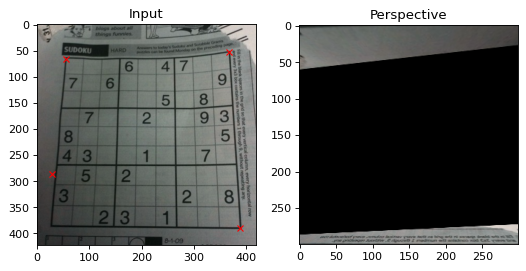

In [ ]:
img = cv.imread('sudoku.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[28,287],[389,390], [368,52],])
# Cтавим на углы нового изображения
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)
# Та же операция, что и getPerspectiveTransform
print(cv.findHomography(pts1, pts2)[0])
print(M)
dst = cv.warpPerspective(img,M,(300,300))
plt.figure(figsize=(12, 12), dpi=80)
plt.subplot(131),plt.imshow(img),plt.title('Input')
plt.plot(56, 65, "x", markersize=5, color="red")
plt.plot(368, 52, "x", markersize=5, color="red")
plt.plot(28, 287, "x", markersize=5, color="red")
plt.plot(389, 390, "x", markersize=5, color="red")


plt.subplot(132),plt.imshow(dst),plt.title('Perspective')

plt.show()